# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df=pd.DataFrame(cities)
cities_df.columns=['cities']
cities_df

,cities
0,ushuaia
1,atuona
2,arraial do cabo
3,rikitea
4,faanui
...,...
622,catamarca
623,basco
624,copenhagen
625,angoche


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city_name=[]
lats = []
lngs = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for index,row in cities_df.iterrows(): 
    print(f"Processing Record {index}, {row}")    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + row['cities'] +"&units=imperial"
        response = requests.get(query_url).json()  
        city_name.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt']) 
    except:
        print("City not found. Skipping...")
        city_name.append("")
        lats.append("")
        lngs.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("") 

Processing Record 0, cities    ushuaia
Name: 0, dtype: object
Processing Record 1, cities    atuona
Name: 1, dtype: object
Processing Record 2, cities    arraial do cabo
Name: 2, dtype: object
Processing Record 3, cities    rikitea
Name: 3, dtype: object
Processing Record 4, cities    faanui
Name: 4, dtype: object
Processing Record 5, cities    saint george
Name: 5, dtype: object
Processing Record 6, cities    jamestown
Name: 6, dtype: object
Processing Record 7, cities    cherskiy
Name: 7, dtype: object
Processing Record 8, cities    butaritari
Name: 8, dtype: object
Processing Record 9, cities    albany
Name: 9, dtype: object
Processing Record 10, cities    hobart
Name: 10, dtype: object
Processing Record 11, cities    tuktoyaktuk
Name: 11, dtype: object
Processing Record 12, cities    gberia fotombu
Name: 12, dtype: object
Processing Record 13, cities    zhezkazgan
Name: 13, dtype: object
Processing Record 14, cities    sayansk
Name: 14, dtype: object
Processing Record 15, cities   

In [115]:
len(lats)

627

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
#create dataframe
cities_df["city_name"]= cities
cities_df["city"]= city_name
cities_df["lats"]= lats
cities_df["lngs"]= lngs
cities_df["max_temp"]= max_temp
cities_df["humidity"]= humidity
cities_df["cloudiness"]= cloudiness
cities_df["wind_speed"]=wind_speed
cities_df["country"]=  country
cities_df["date"]= date
cities_df=cities_df[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df

,city_name,city,lats,lngs,max_temp,humidity,cloudiness,wind_speed,country,date
0,ushuaia,Ushuaia,-54.8,-68.3,32,92,20,25.28,AR,1595906256
1,atuona,Atuona,-9.8,-139.03,79.74,71,0,25.7,PF,1595906152
2,arraial do cabo,Arraial do Cabo,-22.97,-42.03,71.62,81,0,24.4,BR,1595906329
3,rikitea,Rikitea,-23.12,-134.97,72.5,82,95,14.09,PF,1595906330
4,faanui,Faanui,-16.48,-151.75,79,80,88,12.97,PF,1595905933
...,...,...,...,...,...,...,...,...,...,...
622,catamarca,San Fernando del Valle de Catamarca,-28.47,-65.79,50,43,0,3,AR,1595906434
623,basco,Basco,20.45,121.97,85.17,73,94,6.26,PH,1595906610
624,copenhagen,Copenhagen,55.68,12.57,63,88,100,14.99,DK,1595906476
625,angoche,Angoche,-16.23,39.91,70.05,77,40,11.59,MZ,1595906610


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [124]:
cities_df2=cities_df[["lats","lngs","max_temp","humidity","cloudiness","wind_speed"]].apply(pd.to_numeric) 
print(cities_df2.dtypes) 
cities_df2["city_name"]= cities
cities_df2["city"]= city_name
cities_df2["country"]=  country
cities_df2["date"]= date
cities_df2=cities_df2[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df2
  

lats          float64
lngs          float64
max_temp      float64
humidity      float64
cloudiness    float64
wind_speed    float64
dtype: object


,city_name,city,lats,lngs,max_temp,humidity,cloudiness,wind_speed,country,date
0,ushuaia,Ushuaia,-54.80,-68.30,32.00,92.0,20.0,25.28,AR,1595906256
1,atuona,Atuona,-9.80,-139.03,79.74,71.0,0.0,25.70,PF,1595906152
2,arraial do cabo,Arraial do Cabo,-22.97,-42.03,71.62,81.0,0.0,24.40,BR,1595906329
3,rikitea,Rikitea,-23.12,-134.97,72.50,82.0,95.0,14.09,PF,1595906330
4,faanui,Faanui,-16.48,-151.75,79.00,80.0,88.0,12.97,PF,1595905933
...,...,...,...,...,...,...,...,...,...,...
622,catamarca,San Fernando del Valle de Catamarca,-28.47,-65.79,50.00,43.0,0.0,3.00,AR,1595906434
623,basco,Basco,20.45,121.97,85.17,73.0,94.0,6.26,PH,1595906610
624,copenhagen,Copenhagen,55.68,12.57,63.00,88.0,100.0,14.99,DK,1595906476
625,angoche,Angoche,-16.23,39.91,70.05,77.0,40.0,11.59,MZ,1595906610


In [128]:
#  Get the indices of cities that have humidity greater or equal to 100%.
humidity_100 = cities_df2.loc[(cities_df2['humidity'] >= 100)]
humidity_100.count()

city_name     12
city          12
lats          12
lngs          12
max_temp      12
humidity      12
cloudiness    12
wind_speed    12
country       12
date          12
dtype: int64

In [131]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
clean_city_data =cities_df2.loc[cities_df2['humidity'] < 100]
clean_city_data['humidity'].count()

566

In [132]:
clean_city_data['humidity'].max()

99.0

In [136]:
# Extract relevant fields from the data frame

clean_city_data2 = clean_city_data[["city","lngs","lats","max_temp","humidity","cloudiness","wind_speed"]]

clean_city_data2

# Export the City_Data into a csv

clean_city_data2.to_csv('Output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

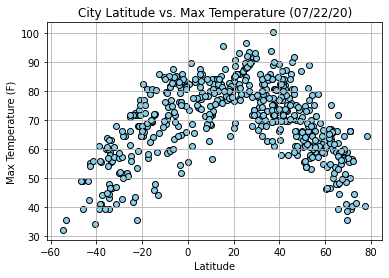

In [139]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["max_temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

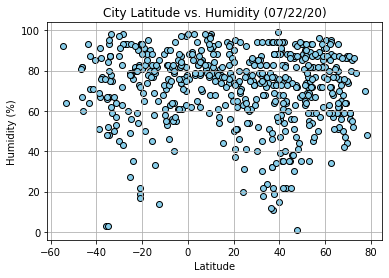

In [140]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

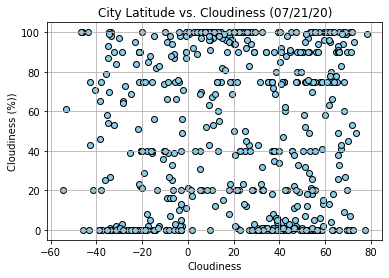

In [141]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/21/20)")
plt.xlabel("Cloudiness")
plt.ylabel("Cloudiness (%))")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

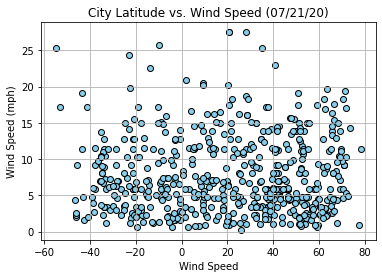

In [142]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["wind_speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/21/20)")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig3.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [148]:
# Create Northern and Southern Hemisphere DataFrames

north_hem=clean_city_data2.loc[clean_city_data2['lats'] >= 0]
north_hem
south_hem=clean_city_data2.loc[clean_city_data2['lats'] < 0]
south_hem

,city,lngs,lats,max_temp,humidity,cloudiness,wind_speed
0,Ushuaia,-68.30,-54.80,32.00,92.0,20.0,25.28
1,Atuona,-139.03,-9.80,79.74,71.0,0.0,25.70
2,Arraial do Cabo,-42.03,-22.97,71.62,81.0,0.0,24.40
3,Rikitea,-134.97,-23.12,72.50,82.0,95.0,14.09
4,Faanui,-151.75,-16.48,79.00,80.0,88.0,12.97
...,...,...,...,...,...,...,...
607,General Roca,-67.58,-39.03,39.20,69.0,0.0,4.70
613,Viedma,-63.00,-40.81,34.00,85.0,71.0,1.99
615,Lircay,-74.72,-12.99,43.99,65.0,1.0,1.28
622,San Fernando del Valle de Catamarca,-65.79,-28.47,50.00,43.0,0.0,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

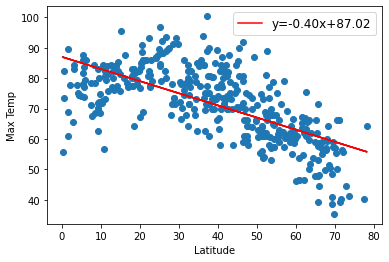

In [161]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['max_temp'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['max_temp'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

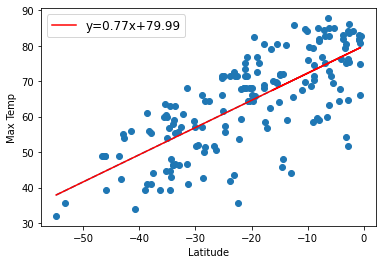

In [163]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['max_temp'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['max_temp'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

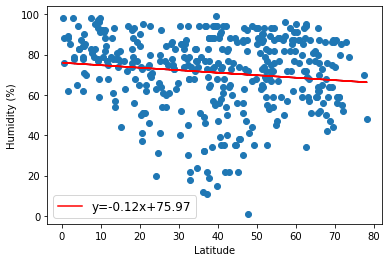

In [165]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['humidity'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['humidity'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

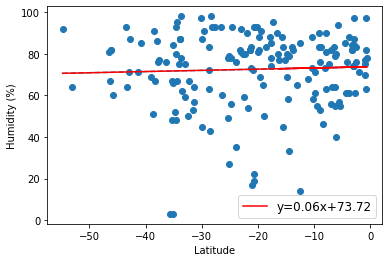

In [166]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['humidity'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['humidity'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

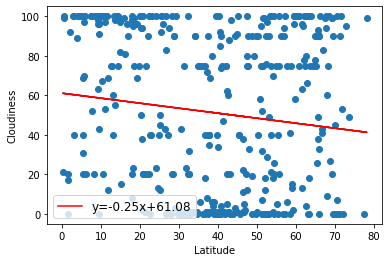

In [167]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['cloudiness'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['cloudiness'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

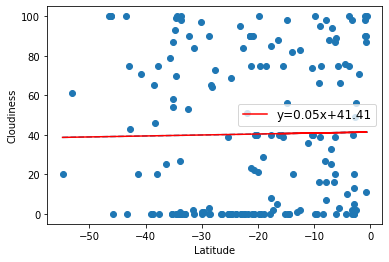

In [168]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['cloudiness'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['cloudiness'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

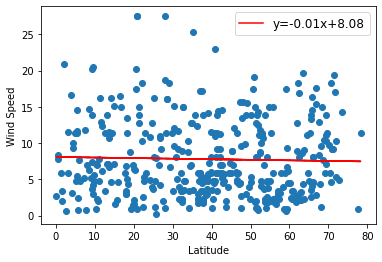

In [169]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['wind_speed'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['wind_speed'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

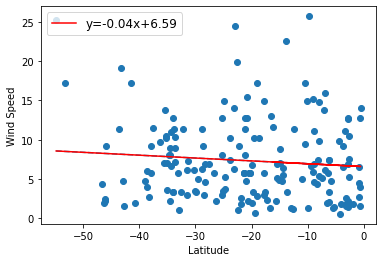

In [170]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['wind_speed'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['wind_speed'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()